# 이변량분석 종합실습1 : car seat 매출 분석

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
# from statsmodels.graphics.mosaicplot import mosaic
# import statsmodels.api as sm

# 1.car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 지역 주민 평균 교육수준(범주: 11~17)	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [3]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


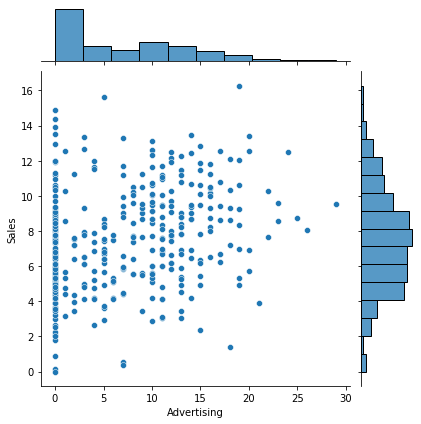

In [10]:
sns.jointplot(data['Advertising'],data[target])

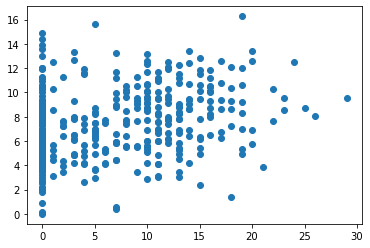

In [35]:
plt.scatter(data['Advertising'],data[target])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


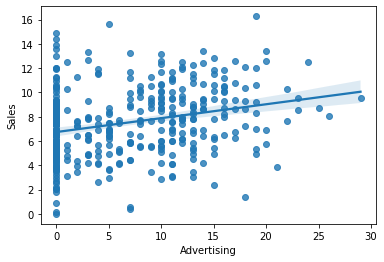

In [36]:
sns.regplot(data['Advertising'],data[target])
plt.show()

2) 수치화 : 상관분석

In [34]:
spst.pearsonr(data['Advertising'],data[target])

(0.269506781376902, 4.377677110302732e-08)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

광고비와 sales간 중간 상관관계 

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


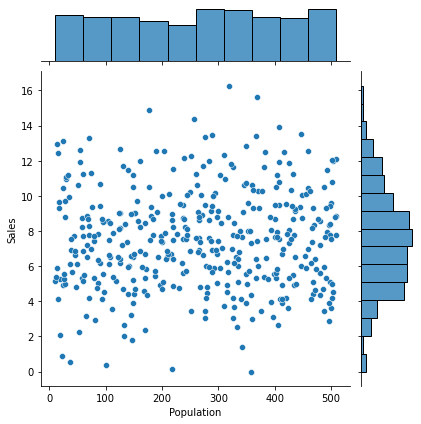

In [30]:
sns.jointplot(data['Population'],data[target])
plt.show()

In [45]:
data['Pop_lev'] = pd.cut(data['Population'], bins = [0,150,300,450,np.inf], labels = ['L','M','MH','H'])

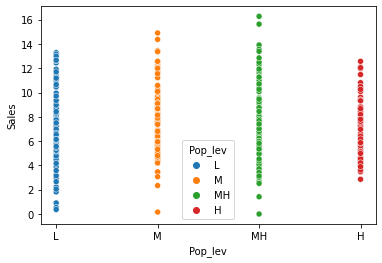

In [46]:
sns.scatterplot(x = 'Pop_lev', y = 'Sales', data = data, hue = 'Pop_lev') 
plt.show()

2) 수치화 : 상관분석

In [47]:
spst.pearsonr(data['Population'],data[target])

(0.0504709844720392, 0.31398160931903)

In [48]:
# 범주화했을때 관계성이 더 두드러짐을 알 수 있다. 
L = data.loc[data['Pop_lev']=='L','Sales']
M = data.loc[data['Pop_lev']=='M','Sales']
MH = data.loc[data['Pop_lev']=='MH','Sales']
H = data.loc[data['Pop_lev']=='H','Sales']
spst.f_oneway(L,M,H)

F_onewayResult(statistic=1.9119587414390122, pvalue=0.14973594687488026)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

인구와 sales간 약한 상관관계
그러나 범주화했을때는 관계성이 좀 더 두드러짐. 
쨋든 인구 수 자체보다는 구매할 인구가 많은것이 중요하다는것을 알 수 있다. 

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


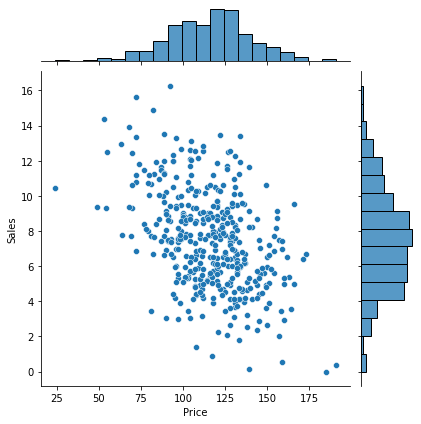

In [32]:
sns.jointplot(data['Price'],data[target])
plt.show()

2) 수치화 : 상관분석

In [33]:
spst.pearsonr(data['Price'],data[target])

(-0.4449507278465726, 7.61818701191294e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

가격과 sales간 중간 상관관계 ?

#### ④ Age -> Sales

In [49]:
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US,Pop_lev
0,9.50,138,11,276,120,Bad,42,Yes,M
1,11.22,111,16,260,83,Good,65,Yes,M
2,10.06,113,10,269,80,Medium,59,Yes,M
3,7.40,117,4,466,97,Medium,55,Yes,H
4,4.15,141,3,340,128,Bad,38,No,MH


1) 시각화 : scatter(regplot), jointplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


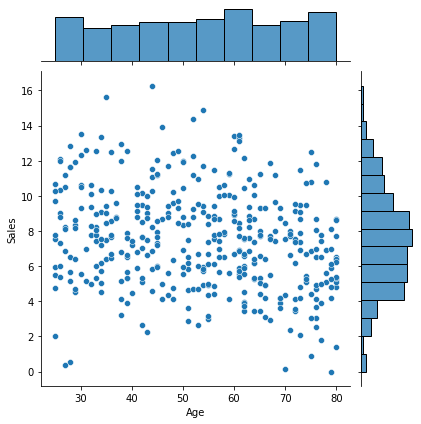

In [16]:
sns.jointplot(data['Age'],data[target])
plt.show()

2) 수치화 : 상관분석

In [38]:
spst.pearsonr(data['Age'],data[target])

(-0.2318154396045765, 2.7889498393711916e-06)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

나이와 sales간 중간 상관관계 
* 추가 수집 정보 : 평균연령, 평균+분산(표준편차), 연령대별인구 비율 

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


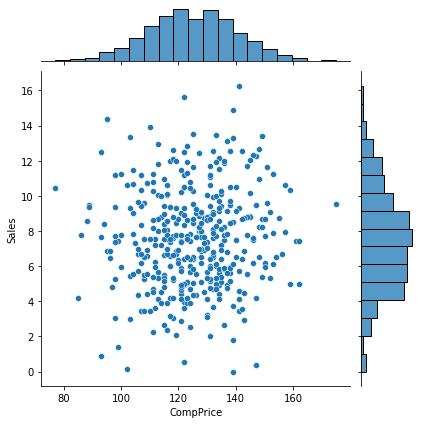

In [6]:
sns.jointplot(data['CompPrice'],data[target])
plt.show()

2) 수치화 : 상관분석

In [39]:
spst.pearsonr(data['CompPrice'],data[target])

(0.06407872955062152, 0.2009398289418295)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

경쟁사 가격과 sales간 상관관계 거의 없는것으로 보여짐.  
타사 가격 자체는 의미가 없음. 그렇지만 중요한것은 자사의 가격 경쟁력이다. 
즉, (타사 가격 - 자사 가격)을 가격 경쟁력으로 설정해 분석하는것이 필요할 것이다.   

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


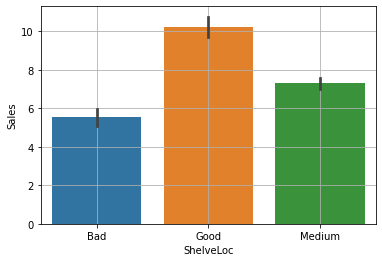

In [66]:
sns.barplot(data['ShelveLoc'],data[target])
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [29]:
B = data.loc[data['ShelveLoc']=='Bad','Sales']
G = data.loc[data['ShelveLoc']=='Good','Sales']
M = data.loc[data['ShelveLoc']=='Medium','Sales']
spst.f_oneway(B,G,M)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

강한 상관관계 가짐. 

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


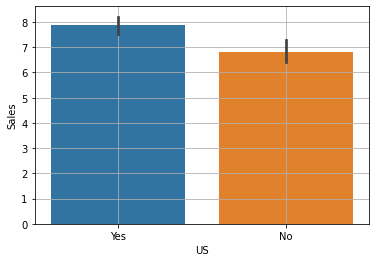

In [67]:
sns.barplot(data['US'],data[target])
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [26]:
Y = data.loc[data['US']=='Yes','Sales']
N = data.loc[data['US']=='No','Sales']
spst.ttest_ind(Y,N)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

미국 내 매장 여부와 판매량은 강한 상관관계를 가짐. 

### (3) 관계 정리하기

① 강한관계

In [ ]:
# ShelveLoc, Ppotent

② 중간관계

In [ ]:
# Advertising, Price, Age, US

③ 관계없음

In [ ]:
# CompPrice, Population

### (4) 추가 분석

In [51]:
# 가격 경쟁력(타사 가격- 자사 가격) 칼럼을 추가. 
data['Ppotent'] = data['CompPrice'] - data['Price']

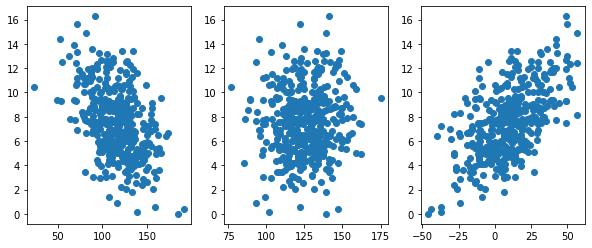

In [63]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.scatter(data['Price'],data[target])

plt.subplot(1,3,2)
plt.scatter(data['CompPrice'],data[target])

plt.subplot(1,3,3)
plt.scatter(data['Ppotent'],data[target])
plt.show()

In [65]:
# 가격 경쟁력 비교가 매우 유의미함을 알 수 있다. 
print(spst.pearsonr(data['Price'],data[target]))
print(spst.pearsonr(data['CompPrice'],data[target]))
print(spst.pearsonr(data['Ppotent'],data[target]))

(-0.4449507278465726, 7.61818701191294e-21)
(0.06407872955062152, 0.2009398289418295)
(0.5979217124533921, 3.877120641788835e-40)
